This notebook will be used to demonstrate how Fig. 4 and 5a have been generated

First, for Fig. 4a we create a fixed surge and define general parameters of the model

In [1]:
import numpy as np
from model_functions import *

# define the parameters
SLR=np.array([0.0,0.33,0.66,1.0,1.5]) #m considered sea level rise in the simulations
colors=['grey','orange','red','blue','purple'] #colors for the plots
A=1e08    #m area of the lagoon
H=2.0     #m depth of the inlet
W=1000.0  #m width of the inlet
z_0=0.001 #m roughness length
dt = 5.0  #s time step of the model
T_max=2*24*3600 #s length of the simulation

#create the time axis in dt step size
t = np.arange(0.0,T_max+dt,dt)

#prescribe a surge, here Gaussian
def Gauss(t,amp,width):
    eta = amp*np.exp(-np.power((t - t[-1]/2.0)/width, 2.)/2)
    return(eta)

eta_0=Gauss(t,1.5,5.0*3600.0)

#do the simulation by using the function model from model_functions, see also model_functions.py
slope, intercep, _,eta_result,_,_ = model(A,H,W,z_0,dt,T_max,eta_0,SLR=SLR,Regression=True)

The output of the model we need is the slope $\alpha$, the interception which is zero and eta_result which has the dimensions (t, SLR)

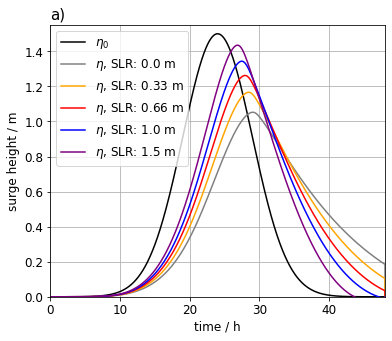

In [10]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})
fig,ax=plt.subplots(1,1,figsize=(6,5))

ax.set_title('a)',loc='left',fontsize=15.0)
ax.grid('on')
ax.plot(t/3600.0,eta_0,color='k',label='$\eta_0$')
for i in np.arange(eta_result.shape[1]):
    ax.plot(t/3600.0,eta_result[:-1,i],color=colors[i],label = '$\eta$, SLR: '+str(SLR[i])+' m')
ax.set_xlim(0.0,T_max/3600.0)
ax.set_xlabel('time / h')
ax.set_ylabel('surge height / m')
ax.set_ylim(0.0,1.55)
ax.legend(loc='upper left')
plt.show()

Let's plot the linear interpolation of the total surge height increase with SLR

Text(1.25, 0.8, 'non linear effect')

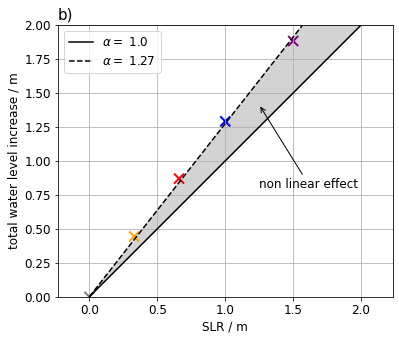

In [12]:
fig,ax=plt.subplots(1,1,figsize=(6,5))

ax.set_title('b)',loc='left',fontsize=15.0)
ax.grid('on')
ax.axis('equal')
ax.fill_between(np.array([0,3]),np.array([0,3]),slope*np.array([0,3])+intercep,color='lightgrey')
ax.plot([0,3],[0,3],color='k',label='$\\alpha =$ 1.0')
ax.plot(np.array([0,3]),slope*np.array([0,3])+intercep,ls='dashed',color='k',label='$\\alpha =$ '+str('%.2f' % slope))

ax.scatter(SLR,np.max(eta_result,axis=0)-np.max(eta_result[:,0])+SLR,c=colors,marker='x',s=100.0,lw=2.0)
ax.set_xlim(0.0,2.0)
ax.set_xlabel('SLR / m')
ax.set_ylabel('total water level increase / m')
ax.set_ylim(0.0,2.0)
ax.legend(loc='upper left')
ax.annotate('non linear effect',(1.25,1.13*1.25),xytext=(1.25,0.8),arrowprops = dict(facecolor ='k',
                               arrowstyle='->'))